#1. Introduction

The study I chose is called: Freezing Inactivation of Escherichia Coli and Enterococcus Faecalis in Water: Response of Different Strains.

It was authored and published in 2008 at the Lakehead University in Canada.

Here researchers set out to compare the result of freezing/thawing cycles at various temperatures on different strains of E. Coli. Specifically strains that are common E. Coli and strains that have antibiotic resistance and are reffered to as Enterococcus faecalis. In this asssignment, I will often refer to the former as "common" and the latter as "resistant."

The work here is done against the backdrop of sanitizing groundwater sources, and the vaiablity of using the natual weather in certain enviroments to aid in this process.

Link to the pdf download of paper: https://www.jstor.org/stable/40575406



#Part 2: Relate research questions, data, and figures

2.1

Here are the areas where I lost points last part of the project, and my corrections:

**What are the features? How many, and what do they tell us about the observations**

In the previous part, I said that there was just one feature, that of the Log Inactivation. This was incorrect, there are really four features: the Name, Strain, Temperature and Log Inactivation. Every observation has these features.

**Fig 1: Describe how it was generated: what are the axes? what are the individual data points? Or what are the cells in the table**

I incorrectly labeled the y axis as the Average Log Inactivation Coeffecient, when in reality is was the Average log reductions.

**Fig 2: Describe why the authors chose to include that particular figure. How does it contribute to the overall arguments of the paper, or support the hypothesis, or show some characteristic of the data**

I was a little vague during my answer here. While the purpose is to look at the data in a closer way, it could be looked at here as a comparison between the efficacy of freeze/thaw as they relate to different temperatures.

**Describe one other figure or table that you might make that would be useful for understanding this data. Explain exactly what would be the axes or entries in the table. Explain why it would be useful and what it might show.**

I am unsure why I got points taken off here, my proposed graph seems resonable and helpful to me. Perhaps my sketch was not detailed enough.

**Describe the number of rows and columns and how the file relates to the data in the paper.**

The dataset that I downloaded did not have 5 columns and 5 rows, it had 80 rows and four columns.


2.2 The main point improved on from the last part of this project is the data is the correct shape and has the correct number of features.

#Part 3

#Part 3.1: Load and clean the data

To obtain the datafiles that I will be working with, first follow the link to the pdf. Scroll down to the included datachart. It is on page 5 in a standard pdf reader, and the copy will denote 827 on the bottom right corner. Begin to parse the contents of Table 2 in a preferred spreadsheet application. The column features are Name, Strain, Temperature, and Inactivation. Name is either E. Coli or Entero... Strain is the 5 or 6 digit number which may contain an 'a' or 'b'. It is the strain of the bacteria being tested. Temperature is the temperature of each experiment. Take each row of the sets of five numbers and copy the first number, the one without the parenthesis, into the Inactivation column. Then, accuratley fill out the corresponding features for that row. Each entry into the .csv file is a freeze/thaw cycle. once you reach the end of a group of five numbers, jump to the next group directly to the right, and start on the first entry. After first row, move down to the second row. The data from the preceding procedue is also made available on this github link

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# replace with the path on your machine
path = '/content/drive/MyDrive/ds4bio/projectpart3/'

# create the master ecoli experiment dataframe
ecoli_dataframe = pd.read_csv(path + 'ecoli_experiment_dataframe.csv', sep = ',')

# get a data frame for the different experiments of interest
# this one is an experiment on strain 961019 common experiment
ecoli_dataframe_common_1 = ecoli_dataframe[ecoli_dataframe['Strain:'] == '961019a']
ecoli_dataframe_common_1.reset_index(inplace = True)

# display the head for the dataframes
ecoli_dataframe.head()
ecoli_dataframe_common_1.head()


,index,Name:,Strain:,Temperature:,Inactivation
0,0,E. Coli,961019a,-7,0.31
1,1,E. Coli,961019a,-7,0.92
2,2,E. Coli,961019a,-7,1.42
3,3,E. Coli,961019a,-7,1.67
4,4,E. Coli,961019a,-7,1.73


Here, I take the large dataset for all the experiments and the bacteria's inactivation coeffecient and turn it into a large dataframe. Using series in Pandas, I am able to slice the master dataframe up into experiments of interest in order to compare and analyze.

There are instances of an experiment in this study that tests two of the same strain of bacteria. Therefore, to create a unique 5 row freeze/thaw cycle sub-dataframe, both the strain name and the temperature value of the experiment must be used. Other combinations of sub-dataframes can be made of course.
I think that this is the best way to do this because the user can easily create as many or as few dataframes as needed to explore the data and analyze it. These sub-dataframes can be highly customizable for the related topic that is being looked into.

The way that I checked if the dataframes were suitable for further analyis was to graph them on a barplot. Since this is the main way the authors convey the information in this paper, it is a good test to see if the way the dataframe was setup works for this dataset. I was able to graph it into a correct and understandable bar graph. I then inspected the dataframe print out to see that all the meta information was contained in the rest of the frame, such as the common name and temperature. After this happened, I considered that no further data cleaning was required, and it was ready for analysis.

#3.2 Desribe Data Numerically



In [135]:
# display the dataframe shape
ecoli_dataframe.shape

(80, 4)

The dataframe has 80 rows, each corresponding to an observation on the cell concentration of the current and previous freeze/thaw cycle. These two obsverations are plugged into a formula, and the Inactivation value is generated and stored for each freeze/thaw cycle.

For each species there are 5 freeze/thaw cycles for every 2 strains per temperature value. Given 4 temperature values and two E. Coli species.

Written out in a numerical way:
80 = 2 * (5 * 2 * 4)

The dataframe was 4 features. Name is the common scientific name for the two species of E. Coli that were studies. Strain is the specefic bacterial strain used in this experiment. Temperature is the temperature that the experimental enviroment was for each of the varying freeze/thaw cycles. The meaning of the inactivation feature is described above.

I am going to investigate the Temperature and Inactivation features. For temperature, I think the max will be -7, and the min would be -80. The mean would be an averge of those two ranges, so maybe around -50. Every observation has a value that is recorded by this feature.

In [150]:
# get metrics from the temperture column
ecoli_dataframe['Temperature:'].describe()

count    80.000000
mean    -33.000000
std      28.542662
min     -80.000000
25%     -42.500000
50%     -22.500000
75%     -13.000000
max      -7.000000
Name: Temperature:, dtype: float64

I was correct for most of my predictions. The mean was -33 so, a little off from my prediction.

For Inactivation, the min will be close to 0.23 and the max will be somwhere close to 7. The mean will probally be a smaller number, maybe around 2.0. Every observation will have a value described by this feature.

In [151]:
# get metrics from the inactivation column
ecoli_dataframe['Inactivation'].describe()

count    80.000000
mean      1.771000
std       1.764527
min       0.060000
25%       0.427500
50%       1.200000
75%       2.520000
max       7.100000
Name: Inactivation, dtype: float64

I was correct for the mean prediction, the count and max. The min was close to and estimate of 0.10.

#3.3: Visualizations

I would like to visulaizations the describe two temperature experiments on two different strains of bacteria.

For the Inactivation feature, I will make a visualization on the first experiment's Inactivation value at the -7C temperature range on the normal bacteria. This visualization deals with a specefic set of Inactivation values.

For the Tempearature feature, I will make a visulization on the -7C value for the first experiment on the antibiotic resistant bacteria and it's corresponding Inactivation values. This visualization deals with a specefic temperature range for an experiment.

With these two experiments visualized, we can compare the freezing effect at -7C temperature on normal and antibiotic resistant bacteria.

In [163]:
# make a sub-dataframe for the first -7C experiment on the resistant bacteria
ecoli_dataframe_resistant_1 = ecoli_dataframe[ecoli_dataframe['Strain:'] == '51299d']
ecoli_dataframe_resistant_1.reset_index(inplace = True)

# remember that ecoli_dataframe_common_1 was already made in a previous cell

# use describe to output metrics on both
print(ecoli_dataframe_common_1.describe())
print(ecoli_dataframe_resistant_1.describe())


          index  Temperature:  Inactivation
count  5.000000           5.0      5.000000
mean   2.000000          -7.0      1.210000
std    1.581139           0.0      0.595861
min    0.000000          -7.0      0.310000
25%    1.000000          -7.0      0.920000
50%    2.000000          -7.0      1.420000
75%    3.000000          -7.0      1.670000
max    4.000000          -7.0      1.730000
           index  Temperature:  Inactivation
count   5.000000           5.0      5.000000
mean   42.000000          -7.0      0.570000
std     1.581139           0.0      0.342199
min    40.000000          -7.0      0.200000
25%    41.000000          -7.0      0.340000
50%    42.000000          -7.0      0.530000
75%    43.000000          -7.0      0.700000
max    44.000000          -7.0      1.080000


<Axes: xlabel='index', ylabel='Inactivation'>

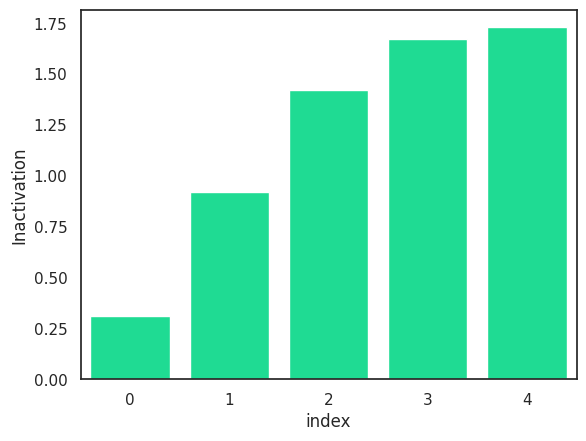

In [161]:
# graph the data relating to the first -7C common bacteria experiment:
sns.barplot(data = ecoli_dataframe_common_1, x = 'index', y = 'Inactivation', color = 'mediumspringgreen')

<Axes: xlabel='index', ylabel='Inactivation'>

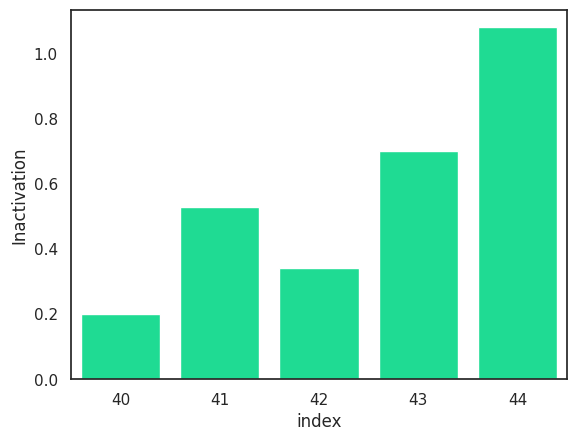

In [160]:
# graph the data relating to the first -7C resistant bacteria experiment:
sns.barplot(data = ecoli_dataframe_resistant_1, x = 'index', y = 'Inactivation', color = 'mediumspringgreen')

The code to make the visualizaions here is using seaborn. It calls the barplot function, and passes the x and y features into the function. Here, the y is the Inactivation coeffcient, and the x is each observation in the sub-dataframe. I used series to create new dataframes that pertained to one experiment each. Here I focused on and graphed two same temperature experiments, one for each species of bacteria. This is beacause I am going to compare the difference in freeze/thaw effency based on antibacterial resistance.

One relation to note on the two graphs is how the Inactivation values are larger on the common bacterial species. This means that after each freeze/thaw cycle, more bacteria was inactivated for the common species, and less bacteria was inactivated for the resistant species. Therefore, the antibacterial bacteria not only had a larger antibiotic resistance, but also a larger cold resistance when compared to a non-antibiotic resistant bacteria.

Another relation to note is how it takes more freeze/thaw cycles before a large number of cells are inactivated in the resistant bacteria compared to the common bacteria.
Compare the first three freeze/thaw cycles, and notice how after the 2nd cycle, large amounts of cells are inactivated. In fact, the inactivation per cycle has reached its peak by the 4th cycle.

This is in contast to the antibiotic resistant bacteria. The first 3 cycles do not inactivate a large number of cells. The value actually descreases on the third cycle compared to the second. It is not until the last cycle that the inactivation value peaks, and even then it is less than the corresponding value on the normal bacteria.

These relations that were discovered from the graph mirror the describe function in some ways. The average value of the Inactivation values for the common bacteria is higher than the average values for the antibiotic resistant one. This proves the first relation I mentioned. The varying standard deviation sections also follow a similar pattern, which hints at the section of analysis on each different freeze/thaw cycle. However, it would still require a careful visual look at each cycle to really uncover that relation. The describe function could not satisfy this requirement.

The visualizations done here are central to the hypothesis that the researchers set out to investigate: the comparsion of an opportunistically pathogenic strain of E. coli, and a vancomycin-resistant and a vancomycin-sensitive strain of Enterococcus faecalis.

These visualizations support the hypothesis by unovering a relation between the two bacterial groups. An answer that the relation would give to the hypothesis would be to illistrate that freezing and thawing techniques affect the two groups differently.